In [85]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [84]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(y, y_pred):
    return -np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))

class LogisticRegression:
    def __init__(self, lr=0.001, n_iters=1000, optimizer="gd", batch_size=32):
        self.lr = lr
        self.n_iters = n_iters
        self.optimizer = optimizer
        self.batch_size = batch_size
        self.weights = None
        self.bias = None

    def fit(self, X, y):
      n_samples, n_features = X.shape
      self.weights = np.zeros(n_features)
      self.bias = 0
      self.losses = []

      for epoch in range(self.n_iters):
          if self.optimizer == "sgd":
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(n_samples):
                xi = X_shuffled[i]
                yi = y_shuffled[i]

                linear_pred = np.dot(xi, self.weights) + self.bias
                pred = sigmoid(linear_pred)

                dw = np.dot(xi, (pred - yi))
                db = (pred - yi)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

          elif self.optimizer == "mini_batch":
            indices = np.random.permutation(n_samples)
            X_shuffled = X[indices]
            y_shuffled = y[indices]
            for i in range(0, n_samples, self.batch_size):
                X_mini = X_shuffled[i:i + self.batch_size]
                y_mini = y_shuffled[i:i + self.batch_size]

                linear_pred = np.dot(X_mini, self.weights) + self.bias
                pred = sigmoid(linear_pred)

                dw = (1 / self.batch_size) * np.dot(X_mini.T, (pred - y_mini))
                db = (1 / self.batch_size) * np.sum(pred - y_mini)

                self.weights -= self.lr * dw
                self.bias -= self.lr * db

          else:
            linear_pred = np.dot(X, self.weights) + self.bias
            pred = sigmoid(linear_pred)

            dw = (1 / n_samples) * np.dot(X.T, (pred - y))
            db = (1 / n_samples) * np.sum(pred - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

          y_pred = sigmoid(np.dot(X, self.weights) + self.bias)
          loss = compute_loss(y, y_pred)
          self.losses.append(loss)
          print(f"Epoch {epoch+1}/{self.n_iters} - Loss: {loss:.6f}")


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        probs = sigmoid(linear_pred)
        return np.where(probs > 0.5, 1, 0)

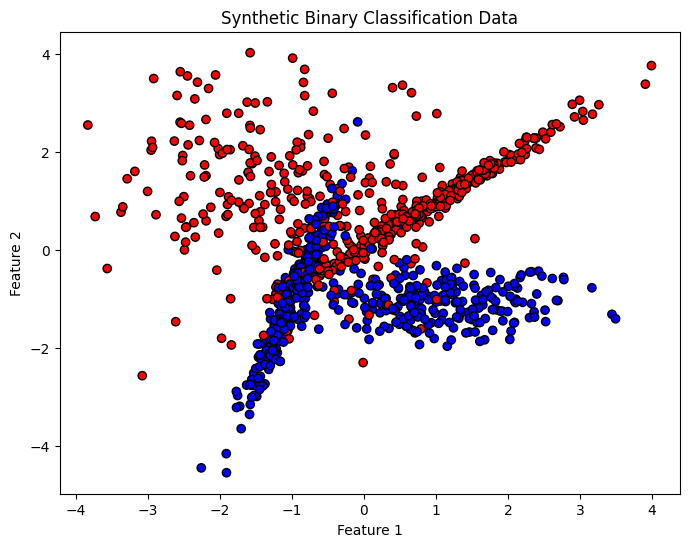

In [86]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Optimizer: GD
Epoch 1/1000 - Loss: 0.692898
Epoch 2/1000 - Loss: 0.692650
Epoch 3/1000 - Loss: 0.692401
Epoch 4/1000 - Loss: 0.692153
Epoch 5/1000 - Loss: 0.691905
Epoch 6/1000 - Loss: 0.691658
Epoch 7/1000 - Loss: 0.691410
Epoch 8/1000 - Loss: 0.691163
Epoch 9/1000 - Loss: 0.690916
Epoch 10/1000 - Loss: 0.690669
Epoch 11/1000 - Loss: 0.690423
Epoch 12/1000 - Loss: 0.690177
Epoch 13/1000 - Loss: 0.689931
Epoch 14/1000 - Loss: 0.689685
Epoch 15/1000 - Loss: 0.689440
Epoch 16/1000 - Loss: 0.689195
Epoch 17/1000 - Loss: 0.688950
Epoch 18/1000 - Loss: 0.688705
Epoch 19/1000 - Loss: 0.688460
Epoch 20/1000 - Loss: 0.688216
Epoch 21/1000 - Loss: 0.687972
Epoch 22/1000 - Loss: 0.687728
Epoch 23/1000 - Loss: 0.687485
Epoch 24/1000 - Loss: 0.687242
Epoch 25/1000 - Loss: 0.686999
Epoch 26/1000 - Loss: 0.686756
Epoch 27/1000 - Loss: 0.686513
Epoch 28/1000 - Loss: 0.686271
Epoch 29/1000 - Loss: 0.686029
Epoch 30/1000 - Loss: 0.685787
Epoch 31/1000 - Loss: 0.685545
Epoch 32/1000 - Loss: 0.685304
E

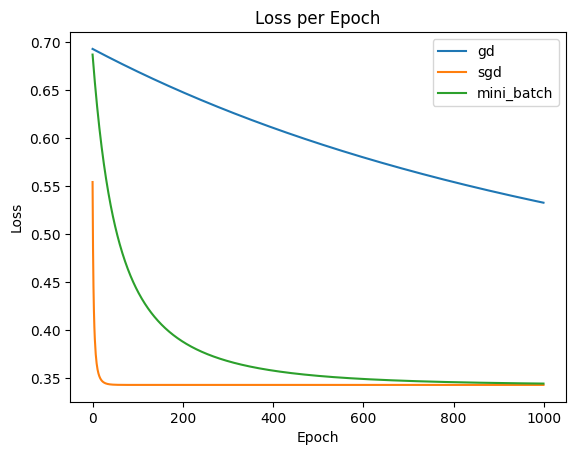

In [87]:
optimizers = ["gd", "sgd", "mini_batch"]
for opt in optimizers:
    print(f"\n Optimizer: {opt.upper()}")
    clf = LogisticRegression(lr=0.001, n_iters=1000, optimizer=opt, batch_size=32)
    clf.fit(X_train, y_train)
    preds = clf.predict(X_test)

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, preds))
    print(f"Accuracy: {accuracy_score(y_test, preds):.4f}")
    print(f"Precision: {precision_score(y_test, preds):.4f}")
    print(f"Recall: {recall_score(y_test, preds):.4f}")
    print(f"F1 Score: {f1_score(y_test, preds):.4f}")

    plt.plot(range(len(clf.losses)), clf.losses, label=opt)

plt.title("Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()